# **Decision Tree**

In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import joblib

# Load the dataset
data = pd.read_csv('/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv')

# Select relevant features and the target variable
X = data.drop('class', axis=1)
y = data['class']

# Encode the target variable (star, galaxy, quasar)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Build the decision tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predictions and evaluating the model
y_pred = classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Select the 6th row (index 5) for prediction
row_6 = X.iloc[5:6, :]

# Make a prediction
predicted_class_index = classifier.predict(row_6)
predicted_class = label_encoder.inverse_transform(predicted_class_index)

print("The predicted class for the 6th row is:", predicted_class[0])

# Save the model to disk
filename = 'decision_tree.sav'
joblib.dump(classifier, filename)


Accuracy: 0.96375

Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97     11860
         QSO       0.91      0.91      0.91      3797
        STAR       1.00      1.00      1.00      4343

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000

The predicted class for the 6th row is: QSO


['decision_tree.sav']

# **Logistic Regression**

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load the dataset
data = pd.read_csv('/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv')

# Select features and the target variable
X = data.drop('class', axis=1)
y = data['class']

# Encode the target variable (star, galaxy, quasar)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Feature Selection using RFE with cross-validation
logreg = LogisticRegression(max_iter=1000)  # Increased the number of iterations
selector = RFECV(logreg, step=1, cv=5)
selector = selector.fit(X_train, y_train)

# Print the optimal number of features
print("Optimal number of features : %d" % selector.n_features_)

# Transform training and testing sets so they only contain the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Build the logistic regression model
classifier = LogisticRegression(max_iter=1000)  # Increased the number of iterations
classifier.fit(X_train_selected, y_train)

# Predictions and evaluating the model
y_pred = classifier.predict(X_test_selected)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with feature selection:", accuracy)

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Save the model and the selector to disk
joblib.dump(classifier, 'logistic_regression_with_feature_selection.sav')
joblib.dump(selector, 'feature_selector.sav')


Optimal number of features : 15
Accuracy with feature selection: 0.9553

Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.96      0.97      0.96     11860
         QSO       0.95      0.88      0.91      3797
        STAR       0.95      1.00      0.97      4343

    accuracy                           0.96     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.96      0.96      0.95     20000



['feature_selector.sav']

In [38]:
# Load the model and the feature selector from disk
classifier = joblib.load('logistic_regression_with_feature_selection.sav')
selector = joblib.load('feature_selector.sav')

# Select the 6th row (index 5) for prediction
row_6 = data.iloc[5:6, :].drop('class', axis=1)

# Normalize the features of the row
row_6_scaled = scaler.transform(row_6)

# Select the features as per the feature selector
row_6_selected = selector.transform(row_6_scaled)

# Make a prediction
predicted_class_index = classifier.predict(row_6_selected)
predicted_class = label_encoder.inverse_transform(predicted_class_index)

print("The predicted class for the 6th row is:", predicted_class[0])

The predicted class for the 6th row is: QSO


# **Naive Bayes Classifier**

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load the dataset
data = pd.read_csv('/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv')

# Select features and the target variable
X = data.drop('class', axis=1)
y = data['class']

# Encode the target variable (star, galaxy, quasar)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Load the feature selector from disk
selector = joblib.load('/kaggle/input/my-models/models/feature_selector.sav')

# Transform training and testing sets so they only contain the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Build the Naive Bayes model
nb = GaussianNB(var_smoothing=1e-9)
nb.fit(X_train_selected, y_train)

# Predictions and evaluating the model
y_pred = nb.predict(X_test_selected)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with feature selection (Naive Bayes):", accuracy)

# Detailed classification report
print("\nClassification Report (Naive Bayes):\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Save the model to disk
joblib.dump(nb, 'naive_bayes_model.sav')

# Predict for the 6th row
row_6 = data.iloc[5:6, :].drop('class', axis=1)
actual_class = data.iloc[5, data.columns.get_loc('class')]
row_6_scaled = scaler.transform(row_6)
row_6_selected = selector.transform(row_6_scaled)
predicted_class_index = nb.predict(row_6_selected)
predicted_class = label_encoder.inverse_transform(predicted_class_index)

print("The actual class for the 6th row is:", actual_class)
print("The predicted class for the 6th row is:", predicted_class[0])


Accuracy with feature selection (Naive Bayes): 0.7089

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

      GALAXY       0.75      0.86      0.80     11860
         QSO       0.58      0.88      0.70      3797
        STAR       0.98      0.16      0.27      4343

    accuracy                           0.71     20000
   macro avg       0.77      0.63      0.59     20000
weighted avg       0.77      0.71      0.67     20000

The actual class for the 6th row is: QSO
The predicted class for the 6th row is: QSO


# **KNN**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load the dataset
data = pd.read_csv('/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv')

# Select features and the target variable
X = data.drop('class', axis=1)
y = data['class']

# Encode the target variable (star, galaxy, quasar)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Load the feature selector from disk
selector = joblib.load('/kaggle/input/my-models/models/feature_selector.sav')

# Transform training and testing sets so they only contain the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Build the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_selected, y_train)

# Predictions and evaluating the model
y_pred = knn.predict(X_test_selected)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with feature selection (KNN):", accuracy)

# Detailed classification report
print("\nClassification Report (KNN):\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Save the model to disk
joblib.dump(knn, 'knn_model.sav')

# Predict for the 6th row
row_6 = data.iloc[5:6, :].drop('class', axis=1)
actual_class = data.iloc[5, data.columns.get_loc('class')]
row_6_scaled = scaler.transform(row_6)
row_6_selected = selector.transform(row_6_scaled)
predicted_class_index = knn.predict(row_6_selected)
predicted_class = label_encoder.inverse_transform(predicted_class_index)

print("The predicted class for the 6th row is:", predicted_class[0])


# **Agglomerative Clustering**

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


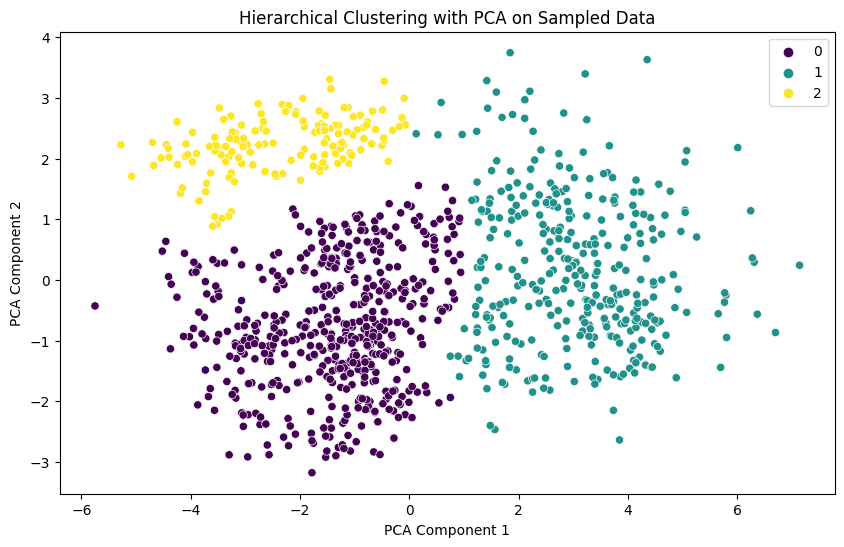

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv')

# Sample a subset of the data if it's too large
# Adjust the sample size as needed
data_sample = data.sample(n=1000, random_state=42)

# Select relevant features
X = data_sample.drop('class', axis=1)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)  # Adjust the number of components based on your needs
X_pca = pca.fit_transform(X_scaled)

# Perform hierarchical clustering
hierarchical_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = hierarchical_model.fit_predict(X_pca)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', legend='full')
plt.title('Hierarchical Clustering with PCA on Sampled Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


# **K-Means Clustering**

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


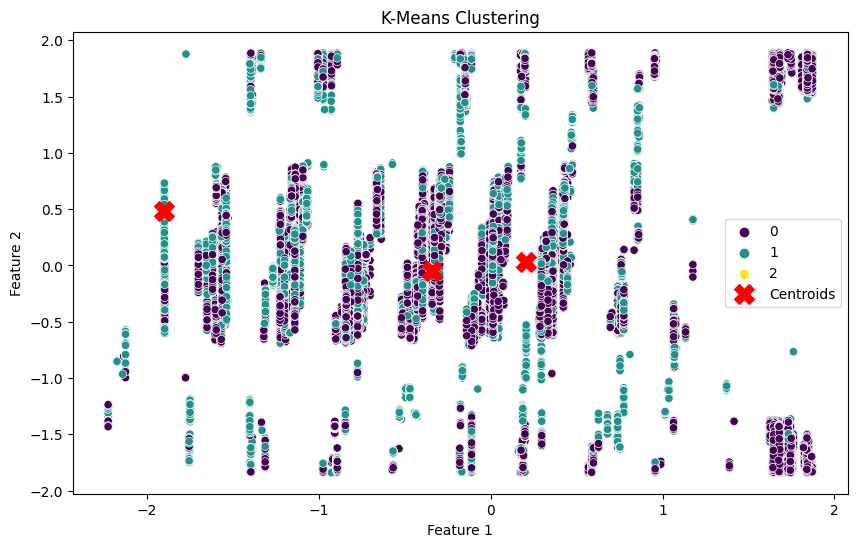

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv')

# Select relevant features
X = data.drop('class', axis=1)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
# You may need to adjust the number of clusters based on your data
# In this example, I'm using 3 clusters
kmeans_model = KMeans(n_clusters=3, random_state=42)
clusters = kmeans_model.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis', legend='full')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.legend()
plt.show()
